# Sprint17

### 【問題1】学習と推定

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
%pwd

'/content'

In [0]:
#kaggleディレクトリの作成
mkdir .kaggle

In [5]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [0]:
import json

token = {"username":"nobutatsu93kobayashi","key":"e915fbab11246390e300ab9366096ad7"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json
# ここで大体エラーが出るので，先に↓↓のkaggleコマンドを実行する

In [11]:
#先にこっちを実行するとエラーになるので再度↑のコマンドを実行するといける．
# simpsonデータセットのAPIcommandを叩いてデータセットをダウンロードする
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

100% 1.08G/1.08G [00:17<00:00, 70.5MB/s]
100% 1.08G/1.08G [00:17<00:00, 64.4MB/s]


In [12]:
# 解凍
!unzip /content/the-simpsons-characters-dataset.zip  -d Simpsons

Archive:  /content/the-simpsons-characters-dataset.zip
  inflating: Simpsons/annotation.txt  
  inflating: Simpsons/characters_illustration.png  
  inflating: Simpsons/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_0.jpg  
  inflating: Simpsons/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_1.jpg  
  inflating: Simpsons/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_10.jpg  
  inflating: Simpsons/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_11.jpg  
  inflating: Simpsons/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_12.jpg  
  inflating: Simpsons/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_13.jpg  
  inflating: Simpsons/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_14.jpg  
  inflating: Simpsons/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_15.jpg  
  inflating: Simpsons/kaggle_simpson_testset/kaggle_simp

In [13]:
# Faster R-CNNをクローン
!git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 39 (delta 0), reused 2 (delta 0), pack-reused 28
Unpacking objects: 100% (39/39), done.


In [14]:
#Object Detectionの中のmodelへ移動
%cd ObjectDetection/model/

/content/ObjectDetection/model


In [0]:
#ディレクトリ内を検索置換
#grep -l '置換対象の文字列' ./* | xargs sed -i.bak -e 's/置換対象の文字列/置換後の文字列/g'
#model内を検索置換
!grep -l 'image_dim_ordering()' ./* | xargs sed -i.bak -e 's/image_dim_ordering()/image_data_format()/g'
!grep -l "'tf'" ./* | xargs sed -i.bak -e "s/'tf'/'channels_last'/g"

In [16]:
%pwd

'/content/ObjectDetection/model'

In [17]:
%cd ..

/content/ObjectDetection


In [18]:
#一個上のObjectDetction内を検索置換
!grep -l 'image_dim_ordering()' ./* | xargs sed -i.bak -e 's/image_dim_ordering()/image_data_format()/g'
!grep -l "'tf'" ./* | xargs sed -i.bak -e "s/'tf'/'channels_last'/g"

grep: ./model: Is a directory
grep: ./model: Is a directory


In [19]:
#ObjectDetectionへ移動（osを使うバージョン）
import os
os.chdir('/content/ObjectDetection')
print(os.getcwd())

/content/ObjectDetection


In [0]:
# simpsons_datasetを実行するディレクトリ（ObjectDetection）へ動かす
!mv /content/Simpsons/simpsons_dataset /content/ObjectDetection

In [21]:
#学習
!python train.py -p annotation.txt --n_epochs 30 --n_iters 100

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20200128-072803_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30





2020-01-28 07:28:24.436664: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-01-28 07:28:24.461395:

In [22]:
pwd

'/content/ObjectDetection'

In [23]:
%cd /content/ObjectDetection

/content/ObjectDetection


In [28]:
!python predict.py -i /content/Simpsons/kaggle_simpson_testset/kaggle_simpson_testset -c /content/ObjectDetection/save/train_20200128-072803_config.pickle

Using TensorFlow backend.










2020-01-28 07:46:34.983672: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-01-28 07:46:34.988048: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000160000 Hz
2020-01-28 07:46:34.988402: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xa4fe000 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-01-28 07:46:34.988434: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-01-28 07:46:34.990442: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-28 07:46:35.127408: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

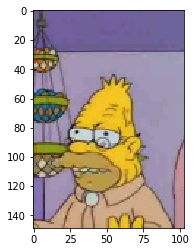

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#画像の読み込み
im = Image.open('/content/ObjectDetection/output/result_abraham_grampa_simpson_0.jpg.png')
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

### 【問題2】論文と実装の対応

コードリーディングを行ってください。

まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。

（例）

RPNを実現しているコードはどこか
RoIプーリングを実現しているコードはどこか
フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。 オリジナルのKerasレイヤーを作成する - Keras Documentation https://keras.io/ja/layers/writing-your-own-keras-layers/

《参考》
KerasではVGG16のクラスが用意されているため、簡単に利用ができます。include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習 が行えます。weights='None'とすればランダムな初期化となります。

（１）RPNを実現しているコードはどこか
RPN：物体領域予測を行っている

train.pyより

In [0]:
def main():
  """train.py内の学習を行うmainプログラム"""
  args = parser.parse_args()
  time_stamp = "{0:%Y%m%d-%H%M%S}".format(datetime.now())
  save_name = os.path.join(args.save_dir, "train_{}".format(time_stamp))
  ###中略###
  model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)
  #ここでmodelディレクトリ内のfaster_rcnn.pyから，model_rpnを受け取っている

modelディレクトリ内のfaster_rcnn.pyより

In [0]:
from model import resnet as nn

def get_model(C, classes_count):
    img_input = Input(shape=(None, None, 3))
    roi_input = Input(shape=(C.num_rois, 4))

    # define the base network (resnet here)
    shared_layers = nn.nn_base(img_input, trainable=True)

    # define the RPN, built on the base layers
    num_anchors = len(C.anchor_box_scales) * len(C.anchor_box_ratios)
    rpn = nn.rpn(shared_layers, num_anchors)
    #ここで，modelディレクトリ内のresnet.pyからrpnを受け取っている


modelディレクトリ内のresnet.pyより

In [0]:
def rpn(base_layers,num_anchors):
  """ここでRPNを構築している"""
  
  x = Convolution2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)

  x_class = Convolution2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
  x_regr = Convolution2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)

  return [x_class, x_regr, base_layers]

（２）RoIプーリングを実現しているコードはどこか¶
ROIプーリング : RPNで抽出された物体領域ごとのバラバラのサイズの特徴マップを同じサイズにする
modelディレクトリ内のRoiPoolingConv.pyより

In [0]:
class RoiPoolingConv(Layer):
    def __init__(self, pool_size, num_rois, **kwargs):

        self.dim_ordering = K.image_dim_ordering()
        assert self.dim_ordering in {'tf', 'th'}, 'dim_ordering must be in {tf, th}'

        self.pool_size = pool_size
        self.num_rois = num_rois

        super(RoiPoolingConv, self).__init__(**kwargs)

    def build(self, input_shape):
        if self.dim_ordering == 'th':
            self.nb_channels = input_shape[0][1]
        elif self.dim_ordering == 'tf':
            self.nb_channels = input_shape[0][3]

    def compute_output_shape(self, input_shape):
        if self.dim_ordering == 'th':
            return None, self.num_rois, self.nb_channels, self.pool_size, self.pool_size
        else:
            return None, self.num_rois, self.pool_size, self.pool_size, self.nb_channels

    def call(self, x, mask=None):

        assert(len(x) == 2)

        img = x[0]
        rois = x[1]

        input_shape = K.shape(img)

        outputs = []

        for roi_idx in range(self.num_rois):

            x = rois[0, roi_idx, 0]
            y = rois[0, roi_idx, 1]
            w = rois[0, roi_idx, 2]
            h = rois[0, roi_idx, 3]
            
            row_length = w / float(self.pool_size)
            col_length = h / float(self.pool_size)

            num_pool_regions = self.pool_size

            if self.dim_ordering == 'th':
                for jy in range(num_pool_regions):
                    for ix in range(num_pool_regions):
                        x1 = x + ix * row_length
                        x2 = x1 + row_length
                        y1 = y + jy * col_length
                        y2 = y1 + col_length

                        x1 = K.cast(x1, 'int32')
                        x2 = K.cast(x2, 'int32')
                        y1 = K.cast(y1, 'int32')
                        y2 = K.cast(y2, 'int32')

                        x2 = x1 + K.maximum(1,x2-x1)
                        y2 = y1 + K.maximum(1,y2-y1)
                        
                        new_shape = [input_shape[0], input_shape[1],
                                     y2 - y1, x2 - x1]

                        x_crop = img[:, :, y1:y2, x1:x2]
                        xm = K.reshape(x_crop, new_shape)
                        pooled_val = K.max(xm, axis=(2, 3))
                        outputs.append(pooled_val)

            elif self.dim_ordering == 'tf':
                x = K.cast(x, 'int32')
                y = K.cast(y, 'int32')
                w = K.cast(w, 'int32')
                h = K.cast(h, 'int32')

                rs = tf.image.resize_images(img[:, y:y+h, x:x+w, :], (self.pool_size, self.pool_size))
                outputs.append(rs)
        #このあたりで，RPNから受け取った特徴マップをアウトプットshapeにreshape"""
        final_output = K.concatenate(outputs, axis=0)
        final_output = K.reshape(final_output, (1, self.num_rois, self.pool_size, self.pool_size, self.nb_channels))

        if self.dim_ordering == 'th':
            final_output = K.permute_dimensions(final_output, (0, 1, 4, 2, 3))
        else:
            final_output = K.permute_dimensions(final_output, (0, 1, 2, 3, 4))

        return final_output
      
      # このクラスはmodelディレクトリ内のresnet.pyのclassifierメソッドにて呼び出される

modelディレクトリ内のresnet.pyより

In [0]:
def classifier(base_layers, input_rois, num_rois, nb_classes = 21, trainable=False):

    pooling_regions = 14
    input_shape = (num_rois,14,14,1024)
    out_roi_pool = RoiPoolingConv(pooling_regions, num_rois)([base_layers, input_rois])
    out = classifier_layers(out_roi_pool, input_shape=input_shape, trainable=True)

### 【問題3】学習済みの重みによる推定

In [30]:
%cd /content/

/content


In [31]:
# keras-YOLOをクローン
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 845.00 KiB/s, done.
Resolving deltas: 100% (65/65), done.


In [32]:
#keras-YOLOに移動
%cd /content/keras-yolo3

/content/keras-yolo3


In [33]:
# yolov3weightのダウンロード（学習済みの重み）
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-01-28 07:59:49--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  20.1MB/s    in 13s     

2020-01-28 08:00:03 (18.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [34]:
#事前学習済みの重みをロード
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2020-01-28 08:00:10.438312: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-01-28 08:00:10.443359: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000160000 Hz
2020-01-28 08:00:10.443562: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x21d4bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-01-28 08:00:10.443589: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-01-28 08:00:10.445569: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-28 08:00:10.586505: I tensorflow/

In [35]:
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2020-01-28 08:02:01.223062: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-01-28 08:02:01.228471: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000160000 Hz
2020-01-28 08:02:01.228698: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x28d2bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-01-28 08:02:01.228732: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-01-28 08:02:01.230754: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-28 08:02:01.367216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative val

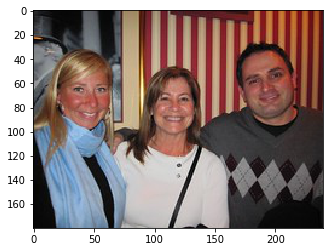

In [36]:
#input_image
im = Image.open('/content/keras-yolo3/5512605834_8f94c1a530_m.jpg')
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

### 【問題4】学習のためのファイルを作成

新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。

アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。
《アノテーションファイルの形式》
image_file_path,xmin,ymin,xmax,ymax,label

In [0]:
#simpsonの画像データをYOLOへ移動
!mv /content/ObjectDetection/simpsons_dataset /content/keras-yolo3

In [39]:
#ObjectDetection内のアノテーションデータのコピー
import shutil
shutil.copyfile("/content/ObjectDetection/annotation.txt", "/content/keras-yolo3/annotation.txt")

'/content/keras-yolo3/annotation.txt'

In [40]:
%pwd

'/content/keras-yolo3'

In [41]:
import pandas as pd
#アノテーションデータの確認
annotation_df = pd.read_csv('annotation.txt',header=None)
n_sample, n_col = annotation_df.shape
print(n_sample,n_col)
annotation_df.head()

7889 6


0  ...                       5
0  simpsons_dataset/abraham_grampa_simpson/pic_00...  ...  abraham_grampa_simpson
1  simpsons_dataset/abraham_grampa_simpson/pic_00...  ...  abraham_grampa_simpson
2  simpsons_dataset/abraham_grampa_simpson/pic_00...  ...  abraham_grampa_simpson
3  simpsons_dataset/abraham_grampa_simpson/pic_00...  ...  abraham_grampa_simpson
4  simpsons_dataset/abraham_grampa_simpson/pic_00...  ...  abraham_grampa_simpson

[5 rows x 6 columns]

In [42]:
label = annotation_df.iloc[:,5].unique()
label,label.size

(array(['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson',
        'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy',
        'edna_krabappel', 'homer_simpson', 'kent_brockman',
        'krusty_the_clown', 'lisa_simpson', 'marge_simpson',
        'milhouse_van_houten', 'moe_szyslak', 'ned_flanders',
        'nelson_muntz', 'principal_skinner', 'sideshow_bob'], dtype=object),
 18)

In [43]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()
#ラベルを覚えさせる
annotation_df.iloc[:,5] = le.fit_transform(annotation_df.iloc[:,5])
annotation_df.tail()

0    1   2    3    4   5
7884  simpsons_dataset/moe_szyslak/pic_0160.jpg   21   9   69   75  13
7885  simpsons_dataset/moe_szyslak/pic_0033.jpg   89   8  126   74  13
7886  simpsons_dataset/moe_szyslak/pic_0337.jpg   66  75  196  245  13
7887  simpsons_dataset/moe_szyslak/pic_1067.jpg  159  44  287  247  13
7888  simpsons_dataset/moe_szyslak/pic_0928.jpg  185  64  396  329  13

In [44]:
# '/content/keras-yolo3'
%pwd

'/content/keras-yolo3'

In [0]:
# YOLO用のアノテーションファイルにする
# imagepath,xmin,y,min,xmax,ymax,classlabel
path = '/content/keras-yolo3/annotation.txt'
out_path = '/content/keras-yolo3/train.txt'

with open(path) as f:
  lines = f.readline() # 1行毎にファイル終端まで全て読む(改行文字も含まれる)
  for i in range(n_sample):
    split_line = lines.split(',')  #「，」で区切って配列にする．
    image_path = split_line[0]
    #split_line[0] = '/content/keras-yolo3/' + image_path
    split_line[0] = './' + image_path #file_pathの変更
    split_line[-1] = str(annotation_df.iloc[i,5]) + '\n'  #クラスラベルの変更

    #YOLO用のアノテーションファイルの作成
    with open(out_path, mode='a') as out_f:
      join_line = ','.join(split_line)  #「，」で区切られているところをくっつける
      join_line = join_line.replace('.jpg,','.jpg ')  #file_pathとbboxの間は空白区切り
      out_f.write(join_line)

In [0]:
#クラスラベルのファイルを作成
pd.Series(label).to_csv('/content/keras-yolo3/model_data/class_label.txt',index=False,header=False)

### 【問題5】学習が行えることの確認

In [47]:
# 事前学習済みの重みをロード
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2020-01-28 08:17:09.905218: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-01-28 08:17:09.910110: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000160000 Hz
2020-01-28 08:17:09.910304: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1480bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-01-28 08:17:09.910334: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-01-28 08:17:09.912348: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-28 08:17:10.052005: I tensorflow/

In [48]:
# '/content/keras-yolo3'
%pwd

'/content/keras-yolo3'

In [49]:
!python train.py

Using TensorFlow backend.








2020-01-28 08:18:50.486297: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-01-28 08:18:50.490875: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000160000 Hz
2020-01-28 08:18:50.491094: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1584bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-01-28 08:18:50.491123: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-01-28 08:18:50.492908: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-28 08:18:50.626859: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
